In [1]:
import torch
torch.__version__

'2.5.1'

In [2]:
import pandas as pd

url= 'Practice/Salary.csv'
df= pd.read_csv(url)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YearsExperience   35 non-null     float64
 1   Salary            35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 692.0 bytes


In [3]:
# data pre-processing

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X= df['YearsExperience '].values
y= df['Salary'].values

#train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)
print(f'x_train_shape: {x_train.shape}, y_train_shape: {y_train.shape}, x_test_shape: {x_test.shape}, y_test_shape: {y_test.shape}')
print(x_train[0], y_train[0], x_test[0], y_test[0])

x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)

x_test= x_test.reshape(-1 ,1)
y_test= y_test.reshape(-1, 1)

x_scaler= StandardScaler()
x_train= x_scaler.fit_transform(x_train)
x_test= x_scaler.transform(x_test)

y_scaler= StandardScaler()
y_train= y_scaler.fit_transform(y_train)
y_test= y_scaler.transform(y_test)

print(x_train[0], y_train[0], x_test[0], y_test[0])


x_train_shape: (24,), y_train_shape: (24,), x_test_shape: (11,), y_test_shape: (11,)
12.3 128765 2.9 56642
[1.60123676] [1.38886721] [-0.93199615] [-0.8346172]


In [4]:
x_train= torch.tensor(x_train, dtype= torch.float32)
y_train= torch.tensor(y_train, dtype= torch.float32)

x_test= torch.tensor(x_test, dtype= torch.float32)
y_test= torch.tensor(y_test, dtype= torch.float32)

print(x_train.shape, y_train.shape, x_test.shape, y_train.shape)
print(x_train[0], y_train[0], x_test[0], y_test[0])

torch.Size([24, 1]) torch.Size([24, 1]) torch.Size([11, 1]) torch.Size([24, 1])
tensor([1.6012]) tensor([1.3889]) tensor([-0.9320]) tensor([-0.8346])


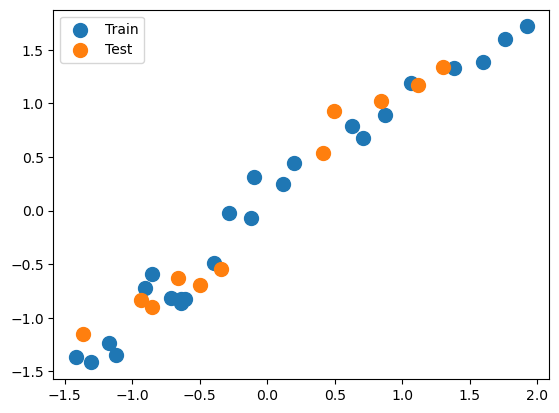

In [15]:
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train, s= 100)
plt.scatter(x_test, y_test, s= 100)
plt.legend(['Train', 'Test']);


In [5]:
from torch.utils.data import TensorDataset, DataLoader 

train_set= TensorDataset(x_train, y_train)
test_set= TensorDataset(x_test, y_test)

print(train_set.tensors[0][0], test_set.tensors[0][0])

tensor([1.6012]) tensor([-0.9320])


In [6]:
train_dataloader= DataLoader(dataset= train_set, batch_size= 5, shuffle= True)
test_dataloader= DataLoader(dataset= test_set, batch_size= 5)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1478ccf6720>,
 <torch.utils.data.dataloader.DataLoader at 0x147ffd43530>)

In [7]:
import torch.nn as nn
from torch.optim import SGD

linear_regression = nn.Linear(in_features=1, out_features=1)
loss_fn= nn.MSELoss()
opt= SGD(params=  linear_regression.parameters(), lr= 0.1, momentum= 0.9)

loss_fn, opt

(MSELoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.1
     maximize: False
     momentum: 0.9
     nesterov: False
     weight_decay: 0
 ))

In [8]:
iteration= 50

In [10]:
for i in range(iteration):    
    for x_batch, y_batch in train_dataloader:

        #model
        y_hat= linear_regression(x_batch)

        #loss
        loss= loss_fn(y_batch, y_hat)

        #gradient
        loss.backward()    

        #update
        opt.step()
        opt.zero_grad()
        
    print(f'[iter]: {i}\nloss: {loss:.4f}, weight: {linear_regression.weight}, bias: {linear_regression.bias}')
    print()

[iter]: 0
loss: 0.1047, weight: Parameter containing:
tensor([[0.6078]], requires_grad=True), bias: Parameter containing:
tensor([-0.2594], requires_grad=True)

[iter]: 1
loss: 0.6588, weight: Parameter containing:
tensor([[0.7936]], requires_grad=True), bias: Parameter containing:
tensor([-0.0766], requires_grad=True)

[iter]: 2
loss: 0.0609, weight: Parameter containing:
tensor([[1.5067]], requires_grad=True), bias: Parameter containing:
tensor([0.4222], requires_grad=True)

[iter]: 3
loss: 1.6239, weight: Parameter containing:
tensor([[0.1008]], requires_grad=True), bias: Parameter containing:
tensor([-0.5288], requires_grad=True)

[iter]: 4
loss: 0.0509, weight: Parameter containing:
tensor([[1.4390]], requires_grad=True), bias: Parameter containing:
tensor([0.0644], requires_grad=True)

[iter]: 5
loss: 0.0825, weight: Parameter containing:
tensor([[0.9265]], requires_grad=True), bias: Parameter containing:
tensor([0.0119], requires_grad=True)

[iter]: 6
loss: 0.1159, weight: Param

1.0184134244918823 -0.01233578473329544


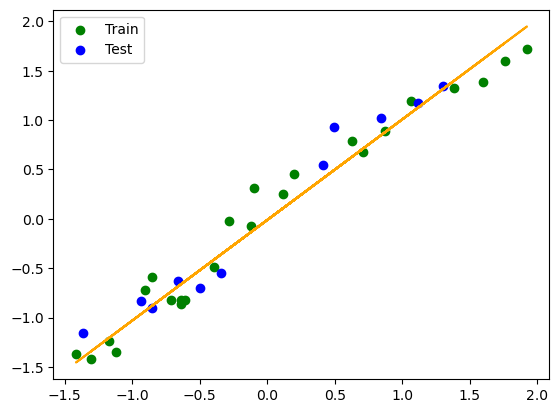

In [35]:
weight= linear_regression.weight.item()
bias= linear_regression.bias.item()

print(weight, bias)

y_hat= x_train * weight + bias

plt.scatter(x_train, y_train, color= 'green')
plt.scatter(x_test, y_test, color= 'blue')
plt.legend(['Train', 'Test'])

plt.plot(x_train, y_hat, color='orange', label='Fitted Line');


In [26]:
with torch.no_grad():
    for x_batch, y_batch in test_dataloader:
        y_hat = linear_regression(x_batch)
        error= nn.functional.l1_loss(y_batch, y_hat)
        print(error)

tensor(0.1305)
tensor(0.1611)
tensor(0.1753)
